In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from collections import Counter



In [3]:
generator = ImageDataGenerator(rescale=1/255)

#generator = ImageDataGenerator(rescale=1/255)

#Test_generator = ImageDataGenerator()


IMAGE_WIDTH=IMAGE_HEIGHT=150

train_dataset = generator.flow_from_directory("F:/Research/Tomograms interpolation",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          #color_mode = 'rgb',
                                          class_mode = 'binary',
                                          subset = 'training',
                                          shuffle=True,
                                          seed = 42
                                         )
                                   
val_dataset = generator.flow_from_directory("F:/Research/val",
                                          target_size=(150,150),
                                          batch_size =32,
                                          #color_mode = 'rgb',
                                          #subset = 'validation',
                                          class_mode = 'binary')

#Test_dataset = Test_generator.flow_from_directory('F:/Research/val',target_size=(150,150))


Found 6868 images belonging to 2 classes.
Found 103 images belonging to 2 classes.


In [14]:
print(train_dataset.class_indices)

{'infocus': 0, 'outfocus': 1}


In [21]:
num_classes = 2
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers


img_height=img_width=150


model = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3),seed=42),
    layers.experimental.preprocessing.RandomRotation(0.1,seed=42),
    layers.experimental.preprocessing.RandomZoom(0.1,seed=42),
  ])

model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))



# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(64,(3,3),activation='relu',kernel_regularizer=regularizers.l2(1e-1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Dropout(0.9))


# Convolutional layer and maxpool layer 4
#model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
#model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(80,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip_2 (RandomFlip)   (None, 150, 150, 3)       0         
_________________________________________________________________
random_rotation_2 (RandomRot (None, 150, 150, 3)       0         
_________________________________________________________________
random_zoom_2 (RandomZoom)   (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)       

In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
epochs = 15
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)

Epoch 1/15
215/215 [==============================] - 164s 719ms/step - loss: 0.9774 - accuracy: 0.8531 - val_loss: 0.3467 - val_accuracy: 0.7864
Epoch 2/15
215/215 [==============================] - 49s 229ms/step - loss: 0.2769 - accuracy: 0.8767 - val_loss: 0.3836 - val_accuracy: 0.7864
Epoch 3/15
215/215 [==============================] - 48s 225ms/step - loss: 0.2646 - accuracy: 0.8850 - val_loss: 0.3429 - val_accuracy: 0.7864
Epoch 4/15
215/215 [==============================] - 49s 226ms/step - loss: 0.2448 - accuracy: 0.8907 - val_loss: 0.3762 - val_accuracy: 0.8350
Epoch 5/15
215/215 [==============================] - 49s 226ms/step - loss: 0.2396 - accuracy: 0.8883 - val_loss: 0.3847 - val_accuracy: 0.8252
Epoch 6/15
215/215 [==============================] - 49s 226ms/step - loss: 0.2322 - accuracy: 0.8998 - val_loss: 0.3914 - val_accuracy: 0.8350: 0.231 - ETA: 2s - loss: 0 - ETA: 0s - loss: 0.2320 - accuracy: 0.
Epoch 7/15
215/215 [==============================] - 48s 224m

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)


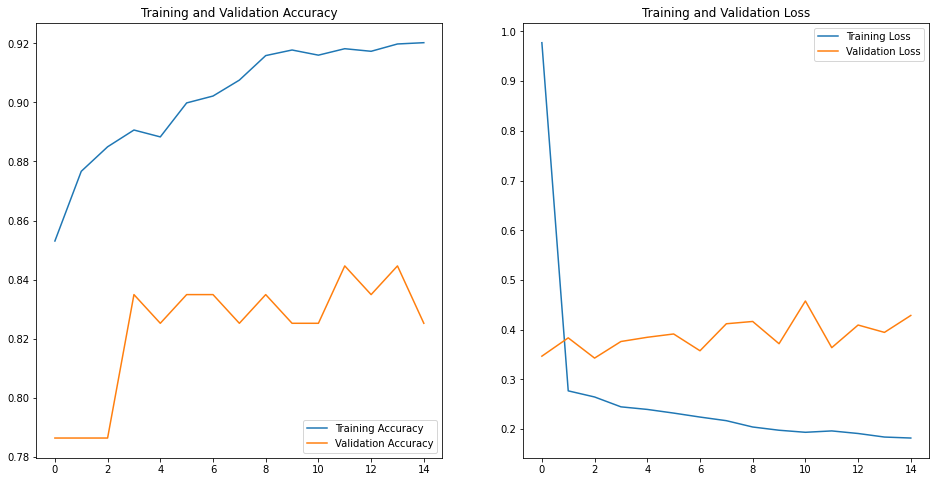

In [26]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:

from tensorflow.keras.applications.imagenet_utils import decode_predictions

def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
    

    
    Y = image.img_to_array(img1)/255

    X = np.expand_dims(Y,axis=0)
    
    val = model.predict_classes(X)
    #val = np.argmax(model.predict(X), axis=-1)
    #decode_predictions(val)[0]
    print(val)

    if val == 0:
        
        plt.xlabel("infocus",fontsize=30)
        
    
    elif val == 1:
        
        plt.xlabel("outfocus",fontsize=30)


c:\users\clive\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[0]]


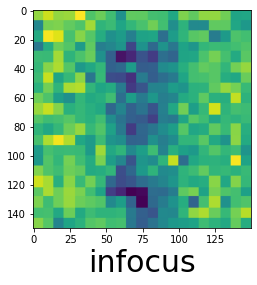

In [28]:
zplane = 42
#interpolation = 'bessel'
predictImage('F:/Research/Test/multi_lead_constrained_none_img{}.png'.format(zplane))
#predictImage(r'F:/Research/val/{}_img{}.png'.format(interpolation,pre_image))

In [29]:
def getFocus(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    z = int(filename.split("_img")[-1].split(".")[0])
    f = filename.split("_img")
   # plt.imshow(img1)
     
    Y = image.img_to_array(img1)/255

    X = np.expand_dims(Y,axis=0)
    
    val = model.predict_classes(X)
    print(z)
    print(f)
    if val == 0:
        return "infocus", z
    #    plt.xlabel("infocus",fontsize=30)
        
    
    elif val == 1:
        return "outfocus", z
        #plt.xlabel("outfocus",fontsize=30)#
    ''''
    else:
        return "confused", z
    '''

In [30]:
direc = "F:/Research/Test"

import glob

focus_label = []
z_plane = []
files = sorted(glob.glob(direc+"/*png"),key=lambda name: int(name.split("_img")[-1].split(".")[0]))
#files.sort()

for pic in files:
    f, z = getFocus(pic)
    focus_label.append(f)
    z_plane.append(z)

#print(focus_label)

2
['F:/Research/Test\\multi_lead_constrained_none', '2.png']
3
['F:/Research/Test\\multi_lead_constrained_none', '3.png']
4
['F:/Research/Test\\multi_lead_constrained_none', '4.png']
5
['F:/Research/Test\\multi_lead_constrained_none', '5.png']
6
['F:/Research/Test\\multi_lead_constrained_none', '6.png']
7
['F:/Research/Test\\multi_lead_constrained_none', '7.png']
8
['F:/Research/Test\\multi_lead_constrained_none', '8.png']
9
['F:/Research/Test\\multi_lead_constrained_none', '9.png']
10
['F:/Research/Test\\multi_lead_constrained_none', '10.png']
11
['F:/Research/Test\\multi_lead_constrained_none', '11.png']
12
['F:/Research/Test\\multi_lead_constrained_none', '12.png']
13
['F:/Research/Test\\multi_lead_constrained_none', '13.png']
14
['F:/Research/Test\\multi_lead_constrained_none', '14.png']
15
['F:/Research/Test\\multi_lead_constrained_none', '15.png']
16
['F:/Research/Test\\multi_lead_constrained_none', '16.png']
17
['F:/Research/Test\\multi_lead_constrained_none', '17.png']
18
['F:/

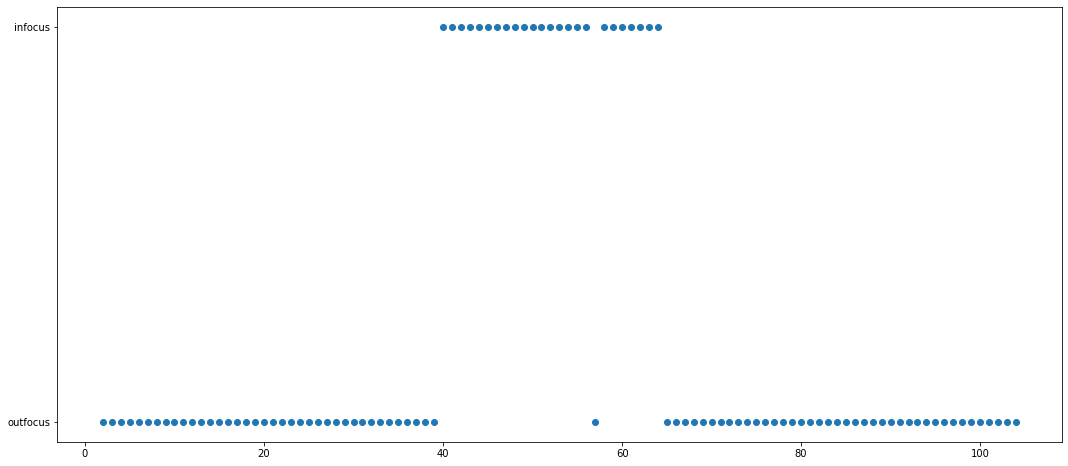

In [31]:
plt.figure(figsize=(18,8))
plt.scatter(z_plane, focus_label)
plt.show()

In [32]:

def load_image(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    z = int(filename.split("_img")[-1].split(".")[0])

   # plt.imshow(img1)
 
    Y = image.img_to_array(img1)/255

    X = np.expand_dims(Y,axis=0)
    
    val.append(model.predict(X))
    z_plane.append(z)
    
    vaL_z_dict = dict(zip(z_plane,val)) 
    
    return vaL_z_dict
    

In [33]:
def get_best_image(filename):
    
    def load_image(filename):
        img1 = image.load_img(filename,target_size=(150,150))

        z = int(filename.split("_img")[-1].split(".")[0])
       # plt.imshow(img1)

        Y = image.img_to_array(img1)/255

        X = np.expand_dims(Y,axis=0)

        val.append(model.predict(X))
        z_plane.append(z)

        vaL_z_dict = dict(zip(z_plane,val)) 

        return vaL_z_dict

    val = []
    z_plane = []
    vaL_z_dict = {}
    files = sorted(glob.glob(direc+"/*png"),key=lambda name: int(name.split("_img")[-1].split(".")[0]))
      
    for pic in files:
        val_z_dict = load_image(pic)
        
    best_pic = min(val_z_dict,key=val_z_dict.get)
    print('z='+str(best_pic))
    return best_pic
    

In [34]:
get_best_image(direc)

z=50


50

In [107]:
def get_number_of_obj(filename):
    
    focus_label = []
    z_plane = []
    i = 0
    files = sorted(glob.glob(direc+"/*png"),key=lambda name: int(name.split("_img")[-1].split(".")[0]))
    checker =[]
   
    def getFocus(filename):
        img1 = image.load_img(filename,target_size=(150,150))

        z = int(filename.split("_img")[-1].split(".")[0])


        Y = image.img_to_array(img1)/255

        X = np.expand_dims(Y,axis=0)

        val = model.predict_classes(X)
        
        if val == 0:
            return "infocus", z
        
    
        elif val == 1:
            return "outfocus", z
            
    
    for pic in files:
        f, z = getFocus(pic)
        focus_label.append(f)
        z_plane.append(z)
    #print(focus_label)
    
    three_split = np.array_split(focus_label,10)
    number_of_objects = 0
    
    
    for i in range(len(three_split)):
        globals()['focus'+str(i)] = 0
        globals()['focus'+str(i)] = three_split[i]
        #print(globals()['focus'+str(i)])
        

    
    for k in range(len(three_split)):
        tally = Counter(globals()['focus'+str(k)])
        checker.append(tally)
        try:
            if tally.most_common()[0][1] >=6 and tally.most_common()[0][0] == 'infocus' or tally.most_common()[1][1] >=6 and tally.most_common()[1][0] == 'infocus':
                print(tally.most_common()[0])
                number_of_objects+=1
        except:
            pass
        
        if checker[k] == checker[k-1] and test[k]['infocus'] >= 10  and checker[k-1]['infocus'] >=10 :
            #print('ok')
            number_of_objects-=1
    
    print('Number of objects = '+str(number_obj))
    
    return number_of_objects

In [109]:
number_obj = get_number_of_obj(direc)

('infocus', 10)
('infocus', 9)
Number of objects = 2


In [ ]:
print('hello')